<a href="https://colab.research.google.com/github/Ahnjihye/allinone_AI/blob/master/AIO_AI_day4_(%EC%99%84%EC%84%B1%EB%B3%B8)_k_means_%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 데이터 불러오고 확인해보기**

In [ ]:
# 방법1) 내 PC에 있는 파일 불러오기

from google.colab import files
uploaded = files.upload()

Saving Iris_1.csv to Iris_1.csv


In [ ]:
# 방법2) 깃허브에 있는 파일 불러오기

! git clone '링크 입력'

In [ ]:
import csv 
 
f = open('Iris_1.csv')       # 파일 오픈
data = csv.reader(f)         # 파일 읽기 reader
next(data)                   # 파일 헤더 건너뛰기 
data = list(data)            # 파일 리스트로 바꾸기


In [ ]:
# 확인용
data[:5]

[['5.1', '3.5', 'Setosa'],
 ['4.9', '3', 'Setosa'],
 ['4.7', '3.2', 'Setosa'],
 ['4.6', '3.1', 'Setosa'],
 ['5', '3.6', 'Setosa']]

In [ ]:
# 꽃받침 길이/넓이 => 숫자(실수)로 변경

for row in data :
    row[0] = float(row[0])
    row[1] = float(row[1])

# 확인용
data[:5]

[[5.1, 3.5, 'Setosa'],
 [4.9, 3.0, 'Setosa'],
 [4.7, 3.2, 'Setosa'],
 [4.6, 3.1, 'Setosa'],
 [5.0, 3.6, 'Setosa']]

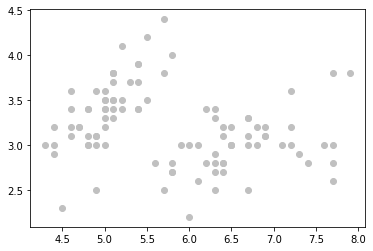

In [ ]:
# 데이터 분포를 확인하기 위한 시각화 (품종을 나타내는 레이블이 없다고 가정)

import matplotlib.pyplot as plt

for row in data :
    plt.scatter(row[0], row[1], color='silver')

plt.show()

# **2. k-means 알고리즘에 따라 구현해보기 (단계별)**

In [ ]:
# [단계1] 변수 초기화, 두 개의 초기 중심을 랜덤으로 설정하기 

import random

meanA, meanB = [0,0], [0,0]

while meanA == meanB :
    meanA = random.choice(data)[:2]
    meanB = random.choice(data)[:2]

In [ ]:
# 확인용
print('초기 중심 A: ', meanA)
print('초기 중심 B: ', meanB)

초기 중심 A:  [6.4, 2.7]
초기 중심 B:  [6.5, 3.2]


In [ ]:
# 함수 정의(중심 두 개를 입력하면 => 원본 데이터와 중심을 시각화해주는 함수)

def draw_initial(dot1, dot2) :
    
    # 원본 데이터 표시하기 
    for row in data :
        plt.scatter(row[0], row[1], color = 'silver')

    # 초기 중심 표시하기
    plt.scatter(dot1[0], dot1[1], color = 'red')
    plt.scatter(dot2[0], dot2[1], color = 'blue')

    plt.show()

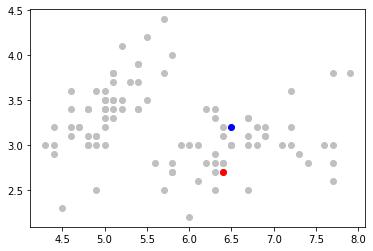

In [ ]:
# [단계1.5] 초기 중심 설정 후의 모습을 시각화

draw_initial(meanA, meanB)

In [ ]:
# 함수 만들기(두 점을 입력하면 => 거리를 리턴해주는 함수)

def calculate_distance(dot1, dot2) :

    # x좌표 차이
    x_dist = dot2[0] - dot1[0]
    # y좌표 차이
    y_dist = dot2[1] - dot1[1]
     
    # 두 점 사이의 거리 계산
    distance = (x_dist**2 + y_dist**2)**0.5

    return distance

In [ ]:
# 함수 만들기(중심 두 개를 입력하면 => 각 중심까지의 거리에 따라 그룹을 배정한 뒤, 그 그룹을 리턴하는 함수)

def clustering(dot1, dot2) :

    gA, gB = [], [] 

    # 각 중심까지의 거리에 따라 그룹 배정
    for row in data :

        distA = calculate_distance(row[:2], dot1)
        distB = calculate_distance(row[:2], dot2)

        if distA < distB :
            gA.append(row)
        else :
            gB.append(row)
    
    return gA, gB

In [ ]:
# [단계2] 중심까지의 거리에 따라 그룹화 <- 반복 구조에 포함

groupA, groupB = clustering(meanA, meanB)

In [ ]:
# 확인용

print(len(groupA), len(groupB))

46 54


In [ ]:
# 함수 만들기(특정 그룹을 입력하면 => 그룹 내 데이터들의 평균을 계산해서 리턴해주는 함수)

def update_mean(group) :

    # x,y좌표 합을 저장할 변수 초기화
    sum_x, sum_y = 0, 0

    # 그룹 내 데이터의 x,y좌표 합을 각각 계산
    for g in group :
        sum_x += g[0]
        sum_y += g[1]
    
    # 그룹 내 데이터의 평균 좌표값으로 중심 설정
    mean = [sum_x/len(group), sum_y/len(group)]
    
    return mean

In [ ]:
# [단계3] 중심 업데이트 <- 반복 구조에 포함

meanA = update_mean(groupA)
meanB = update_mean(groupB)

In [ ]:
# 확인용

print(meanA, meanB)

[5.48421052631579, 2.8552631578947363] [5.988709677419353, 3.4129032258064513]


In [ ]:
# 함수 만들기(그룹 두 개와 중심 두 개를 입력하면 => 그룹화 및 중심 업데이트 후의 모습을 시각화해주는 함수)

def draw_grouped(gA, gB, dot1, dot2) :

    for a in gA :
        plt.scatter(a[0], a[1], color = 'pink')
    for b in gB :
        plt.scatter(b[0], b[1], color = 'skyblue')

    plt.scatter(dot1[0], dot1[1], marker = '^', s= 100, color = 'red')
    plt.scatter(dot2[0], dot2[1], marker = '^', s= 100, color = 'blue')

    plt.show()

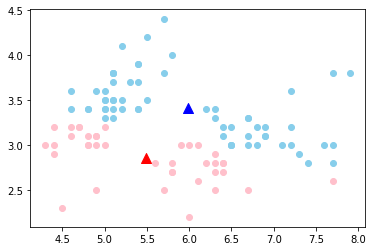

In [ ]:
# [단계3.5] 그룹화 및 중심 업데이트 후의 모습을 시각화 <- 반복 구조에 포함

draw_grouped(groupA, groupB, meanA, meanB)

# **3. 위 과정을 종합하여 k_means 함수로 만들기**

In [ ]:
# 함수 만들기(주어진 학습 데이터를 k-means알고리즘으로 클러스터링해주는 함수)

def k_means() :

    # 초기 중심을 랜덤으로 설정
    meanA, meanB = [0,0], [0,0]
    while meanA == meanB :
        meanA = random.choice(data)[:2]
        meanB = random.choice(data)[:2]

    # 초기 중심이 설정된 모습 시각화(확인용)    
    draw_initial(meanA, meanB)

    # 그룹화 및 중심 업데이트를 원하는 횟수만큼 반복
    for i in range(5) :
        groupA, groupB = clustering(meanA, meanB)
        meanA = update_mean(groupA)
        meanB = update_mean(groupB)
        draw_grouped(groupA, groupB, meanA, meanB)


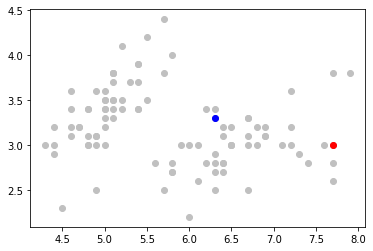

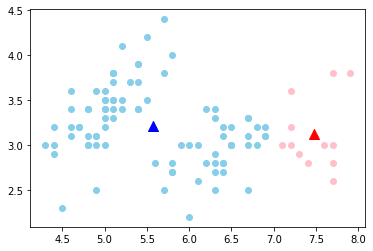

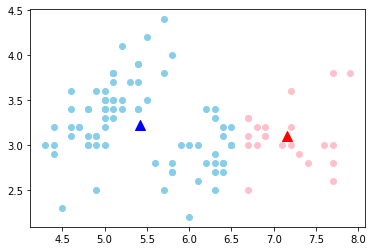

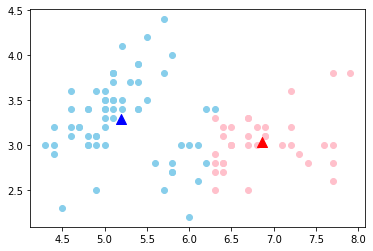

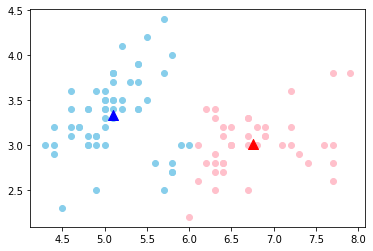

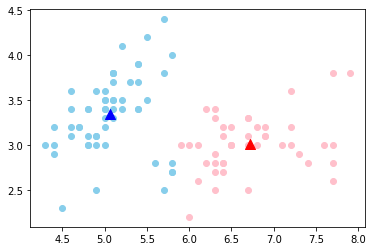

In [ ]:
# 최종 실행

k_means()

# **4. 사이킷런 라이브러리를 활용한 k-means**

In [ ]:
# 랜덤 클러스터 생성 (샘플 수, 속성 수, 클러스터 수, 표준편차)

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=2)

In [ ]:
# 확인용
X

In [ ]:
# 확인용
y

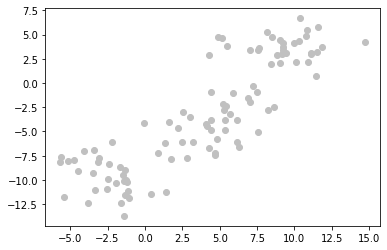

In [ ]:
# 생성된 데이터 시각화

for row in X :
    plt.scatter(row[0], row[1], c='silver')

In [ ]:
# KMeans 알고리즘으로 학습 진행

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
# 학습 후 부여된 레이블
classified = kmeans.labels_

In [ ]:
# 확인용
classified

array([0, 0, 2, 2, 0, 0, 2, 1, 0, 1, 0, 1, 0, 2, 2, 0, 1, 1, 2, 1, 0, 1,
       1, 0, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 0, 1, 1, 1, 2, 0, 1, 0, 2, 2,
       0, 2, 2, 2, 0, 2, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 0,
       2, 0, 1, 0, 1, 2, 2, 0, 1, 1, 1, 0, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0,
       2, 0, 2, 2, 0, 2, 2, 1, 2, 0, 0, 2], dtype=int32)

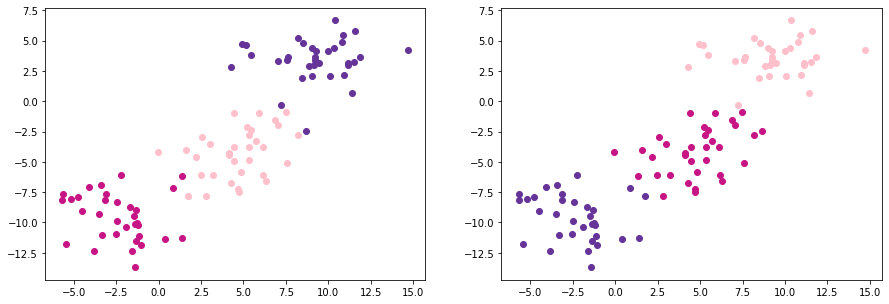

In [ ]:
# KMeans 클러스터링 전/후 시각화

plt.figure(figsize=(15,5))

# KMeans 클러스터링 전 (원본)
plt.subplot(1, 2, 1)
for i in range(len(X)) :
    if y[i] == 0 :
        plt.scatter(X[i][0], X[i][1], c='rebeccapurple')
    elif y[i] == 1 :
        plt.scatter(X[i][0], X[i][1], c='pink')
    elif y[i] == 2 :
        plt.scatter(X[i][0], X[i][1], c='mediumvioletred')

# KMeans 클러스터링 후  
plt.subplot(1, 2, 2)
for i in range(len(X)) :
    if classified[i] == 0 :
        plt.scatter(X[i][0], X[i][1], c='rebeccapurple')
    elif classified[i] == 1 :
        plt.scatter(X[i][0], X[i][1], c='pink')
    elif classified[i] == 2 :
        plt.scatter(X[i][0], X[i][1], c='mediumvioletred')
    
plt.show()